## SelfDrivingCar-P4-Advanced_LaneLines
Udacity CarND Project 4

Advanced Lane Finding
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video, but the main output or product we want you to create is a detailed writeup of the project.

The Project
The goals / steps of this project are the following:

+ Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
+ Apply a distortion correction to raw images.
+ Use color transforms, gradients, etc., to create a thresholded binary image.
+ Apply a perspective transform to rectify binary image ("birds-eye view").
+ Detect lane pixels and fit to find the lane boundary.
+ Determine the curvature of the lane and vehicle position with respect to center.
+ Warp the detected lane boundaries back onto the original image.
+ Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## camera calibration

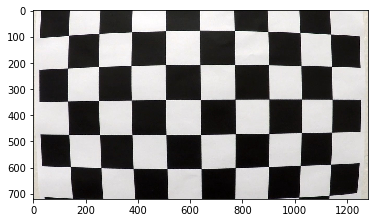

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import cv2

# Read in images
img = mpimg.imread('./camera_cal/calibration1.jpg')
plt.imshow(img)


In [15]:
import glob #glob API
images = glob.glob('./camera_cal/calibration2.jpg')

objpoints = [] # 3D points in the real world (x,y,z) from top left to bottom right
imgpoints = [] # 2D points 

# Prepare object points
objp = np.zeros((6*8,3),np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

#for img in images:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Corners
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

# draw detected corners
if ret == True:
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    objpoints.append(objp)
    imgpoints.append(corners)
    # Camera calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    # undistort an image
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    plt.imshow(dst)
    plt.show()

In [ ]:

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img,mtx,dist,None,mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    # 4) If corners found: 
    if ret == True:
            # a) draw corners
            img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            img_size = img.shape[:2][::-1] #not (nx,ny)
            offset = 100
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            #print(corners.shape)
            src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
            print(src)
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            ##dst = np.float32([[400,150],[400,700],[1000,150],[1000,700]])
            dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
           
            warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)